## Demonstration of distribution reweighting

taken from https://github.com/arogozhnikov/hep_ml/blob/master/notebooks/DemoReweighting.ipynb

hep_ml.reweight contains methods to reweight distributions. Typically we use reweighting of monte-carlo to fight drawbacks of simulation, though there are many applications.

In this example we reweight multidimensional distibutions: original and target, the aim is to find new weights for original distribution, such that these multidimensional distributions will coincide.

Here we have a toy example without a real physics meaning.

Pay attention: equality of distibutions for each feature $\neq$ equality of multivariate distributions.

All samples are divided into training and validation part. Training part is used to fit reweighting rule and test part is used to estimate reweighting quality.


In [1]:
%matplotlib inline
import numpy
import root_numpy

Welcome to JupyROOT 6.12/06


In [2]:
# split imports in three parts to allow server to cope with it
import pandas
from matplotlib import pyplot as plt

In [ ]:
# this last import takes a lot of time
from hep_ml import reweight

In [6]:
# get data
storage = 'https://github.com/arogozhnikov/hep_ml/blob/data/data_to_download/'
!mkdir data
!wget -O data/MC_distribution.root -nc $storage/MC_distribution.root?raw=true
!wget -O data/RD_distribution.root -nc $storage/RD_distribution.root?raw=true

mkdir: cannot create directory ‘data’: File exists
File `data/MC_distribution.root' already there; not retrieving.
File `data/RD_distribution.root' already there; not retrieving.


In [7]:
columns = ['hSPD', 'pt_b', 'pt_phi', 'vchi2_b', 'mu_pt_sum']

original = root_numpy.root2array('data/MC_distribution.root', branches=columns)
target = root_numpy.root2array('data/RD_distribution.root', branches=columns)

original = pandas.DataFrame(original)
target = pandas.DataFrame(target)

original_weights = numpy.ones(len(original))

In [8]:
# take a look into the data
original

,hSPD,pt_b,pt_phi,vchi2_b,mu_pt_sum
0,199,1.616341,2.022476,13.996979,6.465363
1,141,8.054563,1.394660,5.611774,32.218250
2,265,13.330556,2.424426,7.489416,53.322224
3,114,7.071134,4.256384,13.365418,28.284534
4,310,2.398052,0.867687,6.861138,9.592206
5,193,6.410903,1.882330,7.688913,25.643610
6,365,6.103928,3.540346,4.902245,24.415712
7,117,5.384066,1.506197,5.829559,21.536264
8,128,3.545027,3.042505,5.655281,14.180107
9,115,8.892220,1.668138,14.608919,35.568882


In [9]:
# pay attention, actually we have very few data
len(original), len(target)

(1000000, 21441)

In [10]:
def draw_distributions(original, target, new_original_weights):
    plt.figure(figsize=[15, 7])
    for id, column in enumerate(columns, 1):
        xlim = numpy.percentile(numpy.hstack([target[column]]), [0.01, 99.99])
        plt.subplot(2, 3, id)
        plt.hist(original[column], weights=new_original_weights, range=xlim, **hist_settings)
        plt.hist(target[column], range=xlim, **hist_settings)
        plt.title(column)
hist_settings = {'bins': 100, 'alpha': 0.7, 'density': True}

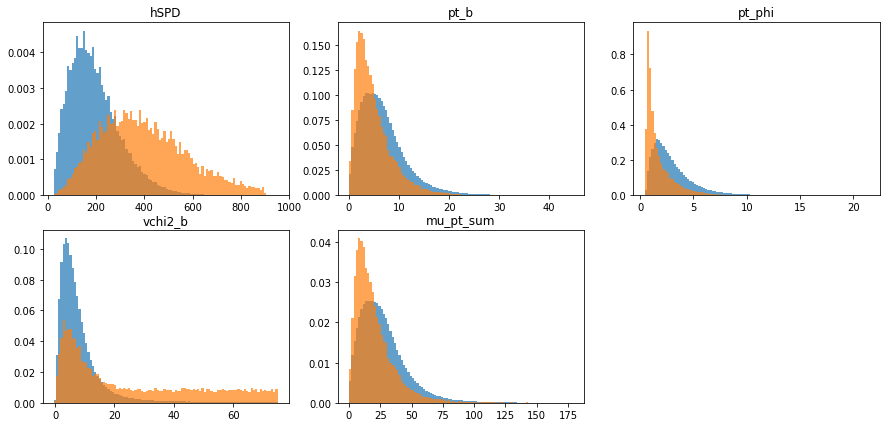

In [11]:
draw_distributions(original, target, original_weights)

### Bin based reweighting

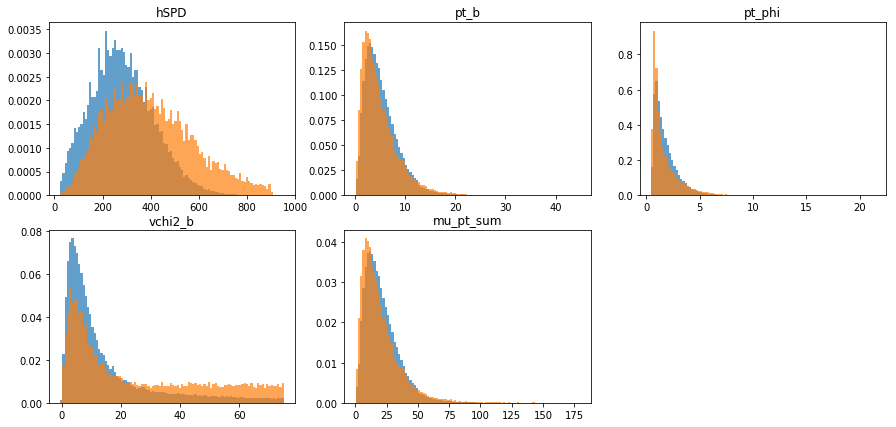

In [12]:
bins_reweighter = reweight.BinsReweighter(n_bins=20, n_neighs=1.)
bins_reweighter.fit(original, target)

bin_weights = bins_reweighter.predict_weights(original)
# validate reweighting rule on the test part comparing 1d projections
draw_distributions(original, target, bin_weights)

## BDT based reweighting

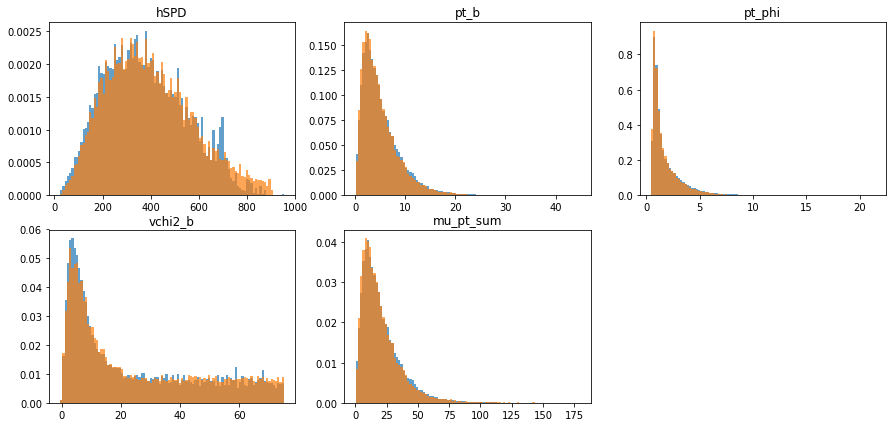

In [13]:
reweighter = reweight.GBReweighter(n_estimators=50, learning_rate=0.1, max_depth=3, min_samples_leaf=1000, 
                                   gb_args={'subsample': 0.4})
reweighter.fit(original, target)

gb_weights = reweighter.predict_weights(original)
# validate reweighting rule on the test part comparing 1d projections
draw_distributions(original, target, gb_weights)